# Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load the Data:

In [2]:
data = pd.read_csv('/Users/anishmannem/Documents/PyramidAIHub/Athletes.csv')
data.head()


,Bib,Zip,Age,Age Group,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,Under 35,M,3832,3961,7793,129,0.033664
1,9,97124,32,Under 35,M,3845,4059,7904,214,0.055657
2,20,80922,40,40-44,M,3795,4157,7952,362,0.095389
3,46,2136,38,35-39,M,3997,4065,8062,68,0.017013
4,51,6119,26,Under 35,M,3979,4198,8177,219,0.055039


In [3]:
data_selected = data[['First Half', 'Second Half', 'Age']]

# Check for missing values
data_selected.isnull().sum()


First Half     0
Second Half    0
Age            0
dtype: int64

- # Scatter Plot of Age vs. First Half and 
- # Bar Plot of Age vs. Average First Half Marathon Split


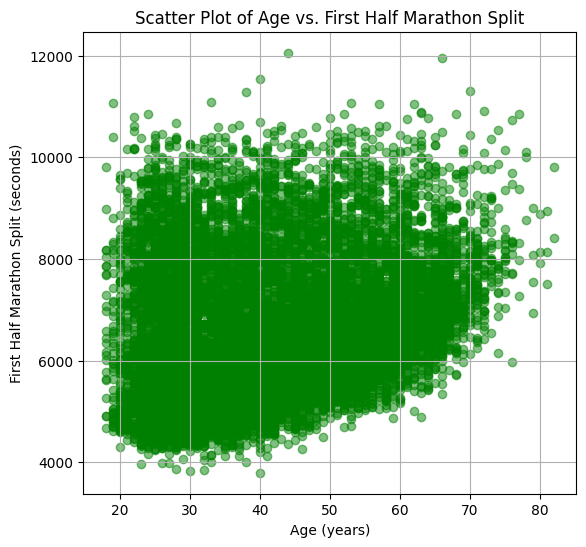

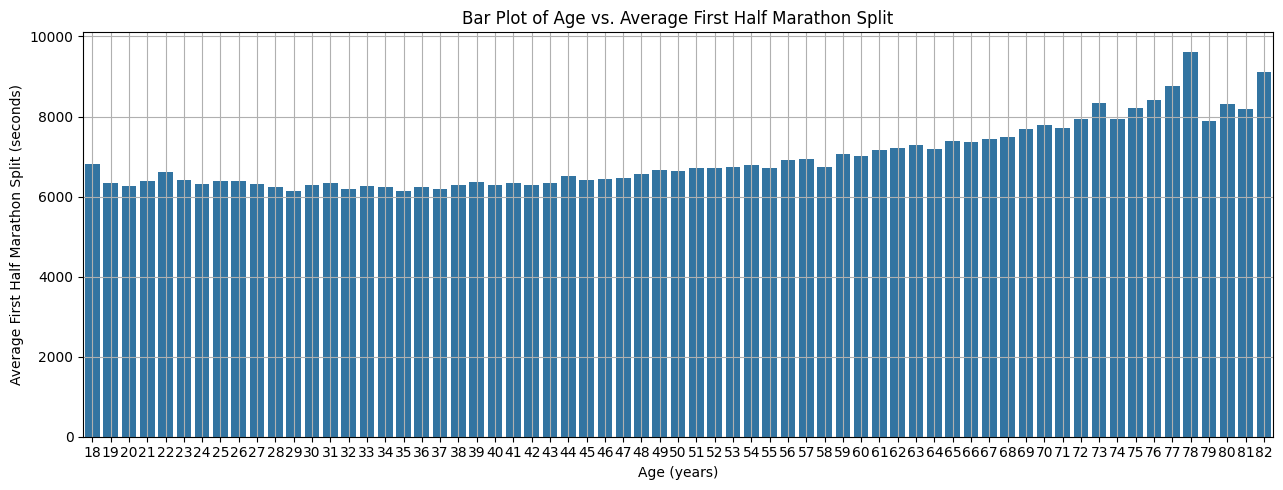

In [4]:
# Scatter Plot of Age vs. First Half
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['First Half'],color='green', alpha=0.5)
plt.title('Scatter Plot of Age vs. First Half Marathon Split')
plt.xlabel('Age (years)')
plt.ylabel('First Half Marathon Split (seconds)')
plt.grid(True)

# Bar Plot of Age vs. Average First Half Marathon Split
avg_first_half = data.groupby('Age')['First Half'].mean().reset_index()

plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='First Half', data=avg_first_half, estimator=np.mean, errcolor=None)
plt.title('Bar Plot of Age vs. Average First Half Marathon Split')
plt.xlabel('Age (years)')
plt.ylabel('Average First Half Marathon Split (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

- # Scatter Plot of Age vs. Second Half and 
- # Bar Plot of Age vs. Average Second Half Marathon Split


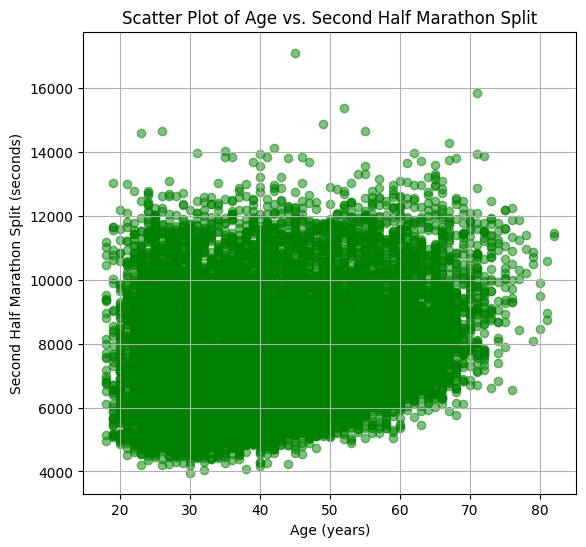

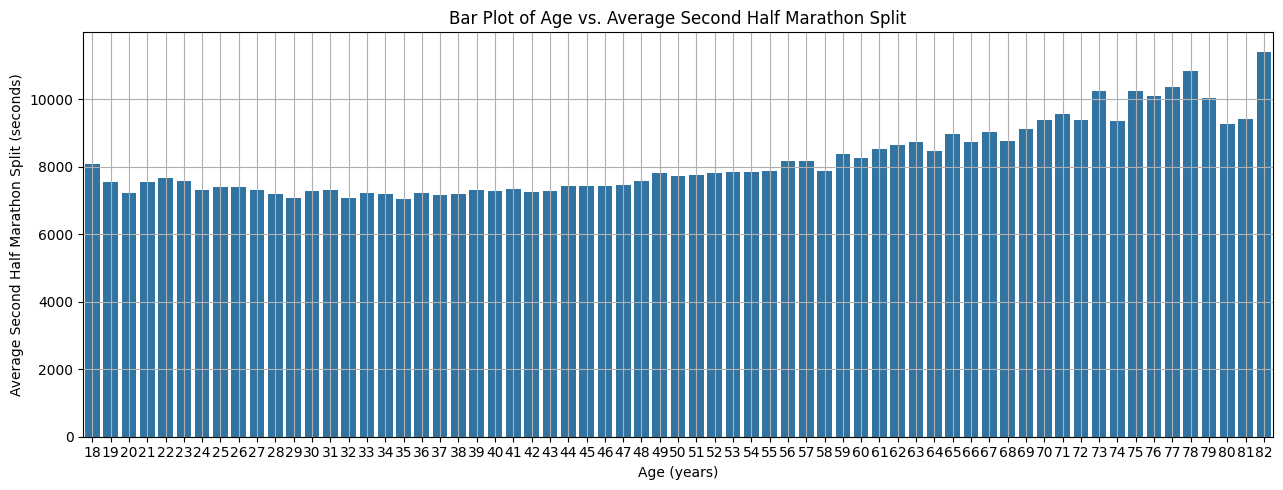

In [5]:
# Scatter Plot of Age vs. Second Half
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter( data['Age'],data['Second Half'], color='green', alpha=0.5)
plt.title('Scatter Plot of Age vs. Second Half Marathon Split')
plt.xlabel('Age (years)')
plt.ylabel('Second Half Marathon Split (seconds)')
plt.grid(True)

# Bar Plot of Age vs. Average Second Half Marathon Split
avg_second_half = data.groupby('Age')['Second Half'].mean().reset_index()

plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='Second Half', data=avg_second_half, estimator=np.mean, errcolor=None)
plt.title('Bar Plot of Age vs. Average Second Half Marathon Split')
plt.xlabel('Age (years)')
plt.ylabel('Average Second Half Marathon Split (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Pairplot for Both Splits vs Age


<Figure size 1200x800 with 0 Axes>

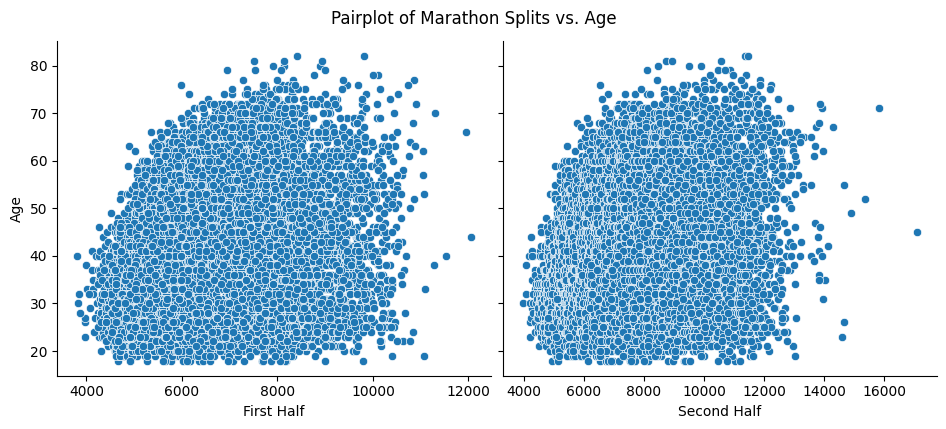

In [6]:
# Pairplot for Both Splits vs. Age
plt.figure(figsize=(12, 8))
sns.pairplot(data, x_vars=['First Half', 'Second Half'], y_vars=['Age'], height=4, aspect=1.2, kind='scatter')
plt.suptitle('Pairplot of Marathon Splits vs. Age', y=1.05)
plt.show()


# Select the Relevant Features:

In [7]:
X = data[['First Half', 'Second Half']]
y = data['Age']


# Split the Data:
- ### Splitting the dataset into training and testing sets using the function train_test_split from sklearn.model_selection

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model:
- ### A regression model, such as LinearRegression from sklearn.linear_model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Evaluate the Model:
- ### Evaluating the model's performance on the testing set using metrics:-
 ### Mean Absolute Error(MAE) or Mean Squared Error(MSE)


In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 10.275231219868001
Mean Squared Error: 152.3445266201889


# Make a Predictions:


[36.1843187  37.16720981]


# Residual Plot
- #### Observed Values (y_test): These are the actual ages of athletes from the test dataset.
- #### Predicted Values (y_pred): These are the ages predicted by our regression model based on the test set inputs (X_test).
- #### Residuals: For each data point in the test set, the residual is calculated as the difference between the observed age (y_test) and the predicted age (y_pred).

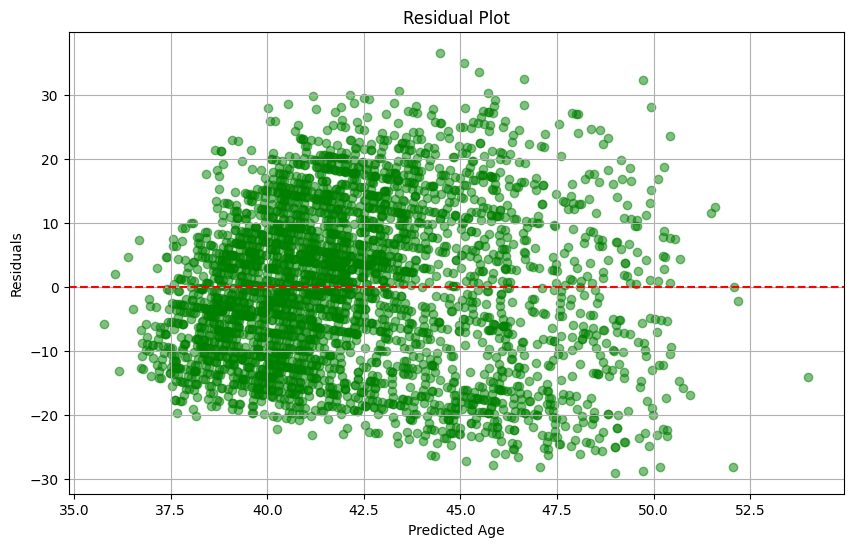

In [13]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

In [32]:
new_data = pd.DataFrame({
    # Example data for two athletes
    'First Half': [3832, 4500],  
    'Second Half': [3961, 4600]
})
age_predictions = model.predict(new_data)

print(f"Athlete 1 age: {age_predictions[0]:.2f} years")
print(f"Athlete 2 age: {age_predictions[1]:.2f} years")


Athlete 1 age: 35.77 years
Athlete 2 age: 37.17 years
